# Does Ethnicity of the Population Correlate with Crime?

- This is a touchy, but important subject. Lately, a lot of tension can be seen in the news and media between police and people of color.
- Is this a case of unfair profiling? Does race actually have anything to do with crime rates?

In [3]:
%matplotlib inline
#Setting up matplotlib to work and display in notebook
import pandas as pd
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt

Data about each county's ethinic make-up and crime rates of different categories from 2016 have been scraped and stored in a CSV. We'll open it and load it as a pandas dataframe.

Note: We are not worried about memory limits and datasize, since the whole table loads immediately when downloading from the online source.

In [6]:
file = r'CrimeByCounty_Clear.csv'
df = pd.read_csv(file)
print df

    Year                  County  Violent_Sum  Violent10k  Property_Sum  \
0   2016          Alameda County        10127  608.890145         59744   
1   2016           Alpine County            6  535.714286            34   
2   2016           Amador County           92  238.181536           761   
3   2016            Butte County          790  344.535836          7307   
4   2016        Calaveras County          178  389.752573           656   
5   2016           Colusa County           46  210.960789           357   
6   2016     Contra Costa County         3895  339.451596         28939   
7   2016        Del Norte County          168  611.576265           608   
8   2016        El Dorado County          389  205.834264          3042   
9   2016           Fresno County         5981  604.596388         31784   
10  2016            Glenn County          103  366.626326           559   
11  2016         Humboldt County          682  498.705705          4001   
12  2016         Imperial

Now we can compare data points and draw observations about the relationship between ethnicity and crime rate.
- We compare percent of population to the crime rate per 10,000 people. Comparison to the crime count would mostly vary due to the differences in population size, which would not be very meaningful.
- First we will run some exploratory graphs comparing ethinicity to crime rates and look for any obvious trends.

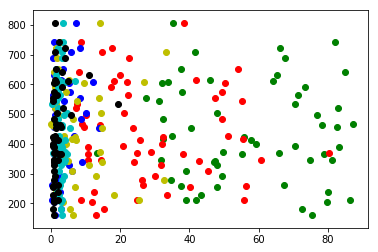

In [7]:
fig = plt.figure()
plt.scatter(df.White, df.Violent10k, color = 'g')
plt.scatter(df.Hispanic,df.Violent10k,color = 'r' )
plt.scatter(df.Black,df.Violent10k,color = 'b' )
plt.scatter(df.Asian,df.Violent10k,color = 'y' )
plt.scatter(df.Mixed,df.Violent10k,color = 'c' )
plt.scatter(df.Other,df.Violent10k,color = 'k' )

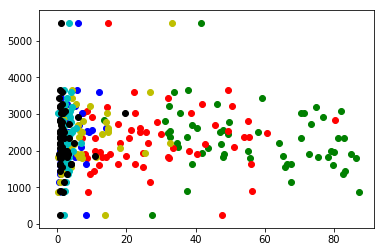

In [8]:
fig = plt.figure()
plt.scatter(df.White, df.Property0k, color = 'g')
plt.scatter(df.Hispanic,df.Property0k,color = 'r' )
plt.scatter(df.Black,df.Property0k,color = 'b' )
plt.scatter(df.Asian,df.Property0k,color = 'y' )
plt.scatter(df.Mixed,df.Property0k,color = 'c' )
plt.scatter(df.Other,df.Property0k,color = 'k' )

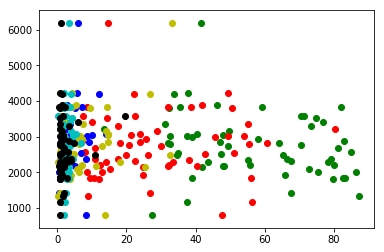

In [9]:
fig = plt.figure()
plt.scatter(df.White, df.CrimeTotal10k, color = 'g')
plt.scatter(df.Hispanic,df.CrimeTotal10k,color = 'r' )
plt.scatter(df.Black,df.CrimeTotal10k,color = 'b' )
plt.scatter(df.Asian,df.CrimeTotal10k,color = 'y' )
plt.scatter(df.Mixed,df.CrimeTotal10k,color = 'c' )
plt.scatter(df.Other,df.CrimeTotal10k,color = 'k' )

----

**Plotting Ethnic Groups Separately**

- It is tough to see any correlation plotting all of the groups together.
- To make things faster, we can loop through each condition and make many charts, one for each combination of ethinicity and crime statistic.
- Making a new directory in "CrimeRate vs Ethnicity" called "plots_by_ethinicity".
- Once all of the charts are made, we can pick through and decide what tells the most compelling story.

In [14]:
#Making lists for ethnic and crime statistic categories
eths = ["White", "Hispanic", "Black", "Asian", "Mixed", "Other"] #ethnic groups
cstats = ["Violent10k", "Property0k", "CrimeTotal10k"] #crime statistics
clabels = [
           "Violent Crimes per 10,000 People",
           "Property Damage per 10,000 People",
           "Overall Crime per 10,000 People",
           ] #Making human-readable labels for the plots
#changed current directory to "ECE-143-Group-14\\CrimeRate vs Ethnicity\\plots_by_ethinicity\\" with os.chdir()

#Checking that the categories are actually columns and typed correctly
for cats in eths + cstats:
    assert cats in df.columns, "%s is not a column in the dataframe." % (cats)

#Looping through ethinic groups
for eth in eths:
    #Looping through crime statistics; crime comes from stats and lab for labels
    for crime, lab in zip(cstats,clabels):
        #Making a simple scatterplot figure with some basic labels
        fig = plt.figure(figsize=(9,6))
        #Ethnicity proportion on the x-axis; crime rates on the y-axis
        plt.scatter(df[eth], df[crime], c='k')
        #Label the y-axis according to the crime, 18pt font for presentation size, wrapping oversize text
        plt.ylabel(lab, size=18, wrap=True)
        #x-axis is the prorportion of the ethinic groups
        plt.xlabel("Percent " + eth, size=18, wrap=True)
        #Descriptive title of what's being compared
        plt.title("Proportion of {0} Ethinicity vs {1} in CA Counties, 2016".format(eth,lab), size=20, wrap=True)
        plt.savefig("{0}_v_{1}.png".format(eth,crime))
        plt.close()

It can be difficult to understand what these graphs are saying without a bit of statistical analysis.

- We will use the r-squared value, as it is a measure of correlation.
- The closer to 1 the more closely correlated the values will be.
- We can find a function to do this in the scipy module, [`scipy.stats.linregress`](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.linregress.html). Below is a useage example from the docs.

```(python)
>>> from scipy import stats
>>> import numpy as np
>>> x = np.random.random(10)
>>> y = np.random.random(10)
>>> slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
```

In [17]:
#Lists of ethnic groups and crime categories are still available
#Just putting the environment modules up here for reference
from scipy import stats
import numpy as np
import pandas as pd

rvals = {} #making a dictionary for the results to be turned into a DataFrame

#going through each crime category, which will be the r-square's data columns
for cs in cstats:
    rvals[cs] = [] #start with an empty list for each column entry
    for es in eths: #go through each ethinic group
        #Pull stats values from the line regression; we care about r_value
        slope, intercept, r_value, p_value, std_err = stats.linregress(df[es], df[cs])
        #record the r_value in the dictionary
        rvals[cs].append(r_value ** 2)

eth_crime_regression = pd.DataFrame(data=rvals)
eth_crime_regression.index = eths

print eth_crime_regression

          CrimeTotal10k  Property0k  Violent10k
White          0.056464    0.062674    0.002226
Hispanic       0.001356    0.002526    0.002540
Black          0.082838    0.065694    0.085967
Asian          0.116839    0.139822    0.000002
Mixed          0.018468    0.020243    0.000992
Other          0.009025    0.002002    0.088386


All of the r-square values are very low. We can look at a bar chart of these values to see relative correlation, but the results overall suggest no overall correlation between ethnic composition and crime rate.

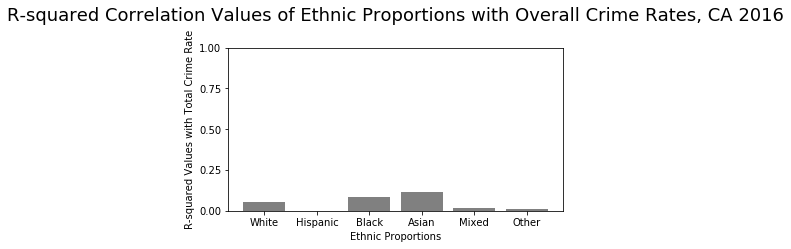

In [24]:
#summarizing the r-squared results in graphical format
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

fig = plt.figure(figsize=(6,3))
#placing the bars
plt.bar(np.arange(6), #Set six bars to be plotted
        eth_crime_regression["CrimeTotal10k"], #bar heights are the r-squares for each ethnicity
        color='0.5' #gray bars for aesthetic
       )
plt.xticks(np.arange(6), eths)
plt.xlabel("Ethnic Proportions")
plt.yticks([0.00,0.25,0.50,0.75,1.00])
plt.ylabel("R-squared Values with Total Crime Rate")
plt.title("R-squared Correlation Values of Ethnic Proportions with Overall Crime Rates, CA 2016\n", size=18, wrap=True)
plt.show()

# Key Conclusions

- Ethinicity of a community does not seem to affect crime rates overall at a county-wide level.
- This means that police cannot expect crime rates to increase in a particular region based off of its race. Other factors are involved in its variation across counties.